In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats
import pickle

import etroc1_array

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
############# 10 fC  #########################
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=0_QInj_1M25_QSel=10fC/'  # Pixle=0
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=1_QInj_1M25_QSel=10fC/'  # Pixle=1
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=2_QInj_1M25_QSel=10fC/'  # Pixle=2
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=3_QInj_1M25_QSel=10fC/'  # Pixle=3
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=4_QInj_1M25_QSel=10fC/'  # Pixle=4
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=5_QInj_1M25_QSel=10fC/'  # Pixle=5
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=6_QInj_1M25_QSel=10fC/'  # Pixle=6
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=7_QInj_1M25_QSel=10fC/'  # Pixle=7
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=8_QInj_1M25_QSel=10fC/'  # Pixle=8
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=9_QInj_1M25_QSel=10fC/'  # Pixle=9
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=10_QInj_1M25_QSel=10fC/'  # Pixle=10
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=11_QInj_1M25_QSel=10fC/'  # Pixle=11
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=12_QInj_1M25_QSel=10fC/'  # Pixle=12
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=13_QInj_1M25_QSel=10fC/'  # Pixle=13
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=14_QInj_1M25_QSel=10fC/'  # Pixle=14
# path = './data/Baseline_Scan_10fC/Scan_Baseline_Pixel=15_QInj_1M25_QSel=10fC/'  # Pixle=15


##############  6 fC  ##########################
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=0_QInj_1M25_QSel=6fC/'  # Pixle=0
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=1_QInj_1M25_QSel=6fC/'  # Pixle=1
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=2_QInj_1M25_QSel=6fC/'  # Pixle=2
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=3_QInj_1M25_QSel=6fC/'  # Pixle=3
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=4_QInj_1M25_QSel=6fC/'  # Pixle=4
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=5_QInj_1M25_QSel=6fC/'  # Pixle=5
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=6_QInj_1M25_QSel=6fC/'  # Pixle=6
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=7_QInj_1M25_QSel=6fC/'  # Pixle=7
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=8_QInj_1M25_QSel=6fC/'  # Pixle=8
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=9_QInj_1M25_QSel=6fC/'  # Pixle=9
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=10_QInj_1M25_QSel=6fC/'  # Pixle=10
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=11_QInj_1M25_QSel=6fC/'  # Pixle=11
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=12_QInj_1M25_QSel=6fC/'  # Pixle=12
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=13_QInj_1M25_QSel=6fC/'  # Pixle=13
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=14_QInj_1M25_QSel=6fC/'  # Pixle=14
path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=15_QInj_1M25_QSel=6fC/'  # Pixle=15

file_in = 'Array_T_Pixel=0_DAC_P0=375_QSel=10_CLSel=0_RfSel=3_IBSel=7_PhaseAdj=140_B1_200000_07-18_14-40-27.dat'






datapath = os.listdir(path)
file_in = [item for item in datapath if item.split('.')[1]=='dat']

# f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[0], 'r')
# lines = f_r.readlines()
# f_r.close()

# print(lines[0:20])

# print(file_in)
num_file = len(file_in)

# qinj_base = 16    ##  2.5 MHz Qinj frequency
# qinj_base = 2       ##  20 MHz
# qinj_base = 100       ##  400 kHz
qinj_base = 32       ##  1.25 MHz

# toa=np.array([0]*num_file)
# print('toa is',toa)

# print(file_in)



toa_list = []
toa_mu_list = []
toa_std_list = []
tot_list = []
tot_mu_list = []
tot_std_list = []
cal_list = []
cal_mu_list = []
cal_std_list = []
hitposition_list = []
hitposition_mod_list = []
phase_list=[]
events_list = []
DAC_list = []
hits_list = []
i=0
for item in tqdm(file_in):
    f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[i], 'r')
    lines = f_r.readlines()
    f_r.close()
    
    num_lines = len(lines)
    
#     print('number of lines is', num_lines)
    
    word_to_plot = num_lines
    
#     print(lines[0])
#     print('hitflag is',lines[0].split()[3])
    
#     print(lines[0])
#     print('toa is',int(lines[0].split()[0]))
    
#     print('split is',lines[0].split())
    
    
    toa = []
    tot = []
    cal = []
    hitposition = []
    hitposition_mod = []
    events = 0
    for m in range (0, num_lines):
        line_item = lines[m]
        if line_item.split()[3] == '1':
            toa += [int(line_item.split()[0])]
            tot += [int(line_item.split()[1])]
            cal += [int(line_item.split()[2])]
            hitposition += [m]
            hitposition_mod += [m%qinj_base]
            events = events + 1
    
    
    toa_mu = np.mean(toa)
    toa_std = np.std(toa)
    tot_mu = np.mean(tot)
    tot_std = np.std(tot)
    cal_mu = np.mean(cal)
    cal_std = np.std(cal)
    
    PhaseAdj = int(file_in[i].split("=")[7].split('_')[0])
    DAC_setting = int(file_in[i].split("=")[2].split('_')[0])
    
    hit_number = len(toa)
    
    toa_list.append(toa)
    toa_mu_list.append(toa_mu)
    toa_std_list.append(toa_std)
    tot_list.append(tot)
    tot_mu_list.append(tot_mu)
    tot_std_list.append(tot_std)
    cal_list.append(cal)
    cal_mu_list.append(cal_mu)
    cal_std_list.append(cal_std)
    hitposition_list.append(hitposition)
    hitposition_mod_list.append(hitposition_mod)
    phase_list.append(PhaseAdj)
    events_list.append(events)
    DAC_list.append(DAC_setting)
    hits_list.append(hit_number)
    
    i += 1
        
#     print('toa[0:5] is', toa[0:5])
#     print('tot[0:5] is', tot[0:5])
#     print('cal[0:5] is', cal[0:5])
#     print('hitposition[0:5] is', hitposition[0:5])
#     print('hitposition_mod[0:5] is', hitposition_mod[0:5])
    
num_bin = None

# print(phase_list)


with open(path+'toa_mu_file.list', 'wb') as f:
    pickle.dump(toa_mu_list, f)
    
with open(path+'toa_std_file.list', 'wb') as f:
    pickle.dump(toa_std_list, f)

with open(path+'tot_mu_file.list', 'wb') as f:
    pickle.dump(tot_mu_list, f)
    
with open(path+'tot_std_file.list', 'wb') as f:
    pickle.dump(tot_std_list, f)

with open(path+'cal_mu_file.list', 'wb') as f:
    pickle.dump(cal_mu_list, f)
    
with open(path+'cal_std_file.list', 'wb') as f:
    pickle.dump(cal_std_list, f)

with open(path+'hitposition_file.list', 'wb') as f:
    pickle.dump(hitposition_list, f)
    
with open(path+'hitposition_mod_file.list', 'wb') as f:
    pickle.dump(hitposition_mod_list, f)

with open(path+'phase_file.list', 'wb') as f:
    pickle.dump(phase_list, f)

with open(path+'DAC_file.list', 'wb') as f:
    pickle.dump(DAC_list, f)

with open(path+'hits_file.list', 'wb') as f:
    pickle.dump(hits_list, f)

    
# with open(path+'toa_mu_file.list', 'rb') as f:
#     my_list = pickle.load(f)
# print(my_list)



C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
print(cal_mu_list)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 196.31159420289856, 170.79175475687103, 170.6465352112676, 170.83379959809292, 170.41118020580228, 170.52265761328806, 170.67736342162135, 170.68646180044894, 170.99946013913376, 171.56358596443783, 170.7027932960894, 170.63024, 170.62608, 170.64416, 170.71968, 170.7272, 170.61904, 170.7904, 170.6456, 170.78624, 170.88944, 170.5672, 170.69568, 170.74416, 170.60416, 170.74368, 170.99664, 170.75568, 170.64576, 171.05184, 171.04976, 171.02064, 170.95552, 171.00496, 170.8856, 170.54576, 170.78592, 171.2152, 171.148, 170.78, 170.8392, 171.20304, 171.17168, 170.8584, 170.77616, 170.95056, 170.94496, 170.83952, 170.88032, 171.05664, 170.99568, 170.86032, 170.91776, 171.04064, 170.81856, 170.8288, 170.96592, 170.79168, 170.71728, 170.90096, 170.86768, 170.7888, 170.88496, 170.75792, 170.70368, 170.72464, 170.83744, 170.8024, 171.0041807364528, 175.9642650183504, 177.3843717001056, 188

In [4]:
######### read data of 10 fC back from files ###########

path_lvl1 = './data/'
path_lvl2 = 'Baseline_Scan_10fC/'
folders = os.listdir(path_lvl1 + path_lvl2)
print(folders)

def myFunc(e):
  return len(e)

folders.sort(key=myFunc)
print(folders)

print(folders[0].split('_')[2])

pixel_index_list = []
toa_mu_10fC_list=[]
toa_std_10fC_list = []
tot_mu_10fC_list=[]
tot_std_10fC_list = []
cal_mu_10fC_list=[]
cal_std_10fC_list = []
hitposition_mod_10fC_list = []
phase_10fC_list = []
DAC_10fC_list = []
hits_10fC_list = []

for item in tqdm(folders):
    with open(path_lvl1+path_lvl2+item+'/'+'toa_mu_file.list', 'rb') as f:
        toa_mu_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'toa_std_file.list', 'rb') as f:
        toa_std_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'tot_mu_file.list', 'rb') as f:
        tot_mu_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'tot_std_file.list', 'rb') as f:
        tot_std_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'cal_mu_file.list', 'rb') as f:
        cal_mu_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'cal_std_file.list', 'rb') as f:
        cal_std_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'hitposition_mod_file.list', 'rb') as f:
        hitposition_mod_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'phase_file.list', 'rb') as f:
        phase_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'DAC_file.list', 'rb') as f:
        DAC_10fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'hits_file.list', 'rb') as f:
        hits_10fC_list.append(pickle.load(f))
    pixel_index_list.append(item.split('_')[2])

print(pixel_index_list)

['Scan_Baseline_Pixel=0_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=10_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=11_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=12_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=13_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=14_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=15_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=1_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=2_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=3_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=4_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=5_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=6_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=7_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=8_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=9_QInj_1M25_QSel=10fC']
['Scan_Baseline_Pixel=0_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=1_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=2_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=3_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=4_QInj_1M25_QSel=10fC', 'Scan_Baseline_Pixel=5_QInj_1M25_QSel=10fC', 'S


['Pixel=0', 'Pixel=1', 'Pixel=2', 'Pixel=3', 'Pixel=4', 'Pixel=5', 'Pixel=6', 'Pixel=7', 'Pixel=8', 'Pixel=9', 'Pixel=10', 'Pixel=11', 'Pixel=12', 'Pixel=13', 'Pixel=14', 'Pixel=15']


In [5]:
######## remove pixel without S-curve  10 fC  ############
print(len(DAC_10fC_list[0]))
ind_pk_list = []

hits_10fC_scurve_list = []
toa_mu_10fC_scurve_list = []
toa_std_10fC_scurve_list = []
tot_mu_10fC_scurve_list = []
tot_std_10fC_scurve_list = []
DAC_10fC_start_list = []
pixel_index_scurve_list = []
DAC_10fC_transition_list = []
item_num = 0
for h in range(0,len(hits_10fC_list)):
    dac_transition = 0
    if hits_10fC_list[h][199] == 0:
        s_curve_found = 0
        for i in range(0,200):
            if hits_10fC_list[h][199-i] > 0 and s_curve_found==0:
                dac_transition = 199-i - 1
                s_curve_found = 1
            if hits_10fC_list[h][199-i] > 6250 and s_curve_found==1:
                dac_start = 199-i+1
                break
            else:
                dac_start = dac_transition - 50
        if s_curve_found == 1:
            hits_10fC_scurve_list.append(hits_10fC_list[h])
            toa_mu_10fC_scurve_list.append(toa_mu_10fC_list[h])
            toa_std_10fC_scurve_list.append(toa_std_10fC_list[h])
            tot_mu_10fC_scurve_list.append(tot_mu_10fC_list[h])
            tot_std_10fC_scurve_list.append(tot_std_10fC_list[h])
            pixel_index_scurve_list.append(pixel_index_list[h])
            DAC_10fC_start_list.append(dac_start)
            DAC_10fC_transition_list.append(dac_transition)
        item_num += 1

# plt.plot(DAC_10fC_list[3][DAC_10fC_start_list[0]:200],hits_10fC_scurve_list[3][DAC_10fC_start_list[0]:200])

# print(toa_std_10fC_scurve_list)

200


In [6]:
######### read data of 6 fC back from files ###########

path_lvl1 = './data/'
path_lvl2 = 'Baseline_Scan_6fC/'
folders = os.listdir(path_lvl1 + path_lvl2)
print(folders)

def myFunc(e):
  return len(e)

folders.sort(key=myFunc)
print(folders)

print(folders[0].split('_')[2])

pixel_index_6fC_list = []
toa_mu_6fC_list=[]
toa_std_6fC_list = []
tot_mu_6fC_list=[]
tot_std_6fC_list = []
cal_mu_6fC_list=[]
cal_std_6fC_list = []
hitposition_mod_6fC_list = []
phase_6fC_list = []
DAC_6fC_list = []
hits_6fC_list = []

for item in tqdm(folders):
    with open(path_lvl1+path_lvl2+item+'/'+'toa_mu_file.list', 'rb') as f:
        toa_mu_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'toa_std_file.list', 'rb') as f:
        toa_std_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'tot_mu_file.list', 'rb') as f:
        tot_mu_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'tot_std_file.list', 'rb') as f:
        tot_std_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'cal_mu_file.list', 'rb') as f:
        cal_mu_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'cal_std_file.list', 'rb') as f:
        cal_std_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'hitposition_mod_file.list', 'rb') as f:
        hitposition_mod_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'phase_file.list', 'rb') as f:
        phase_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'DAC_file.list', 'rb') as f:
        DAC_6fC_list.append(pickle.load(f))
    with open(path_lvl1+path_lvl2+item+'/'+'hits_file.list', 'rb') as f:
        hits_6fC_list.append(pickle.load(f))
    pixel_index_6fC_list.append(item.split('_')[2])

print(pixel_index_6fC_list)

['Scan_Baseline_Pixel=0_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=10_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=11_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=12_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=13_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=14_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=15_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=1_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=2_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=3_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=4_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=5_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=6_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=7_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=8_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=9_QInj_1M25_QSel=6fC']
['Scan_Baseline_Pixel=0_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=1_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=2_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=3_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=4_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=5_QInj_1M25_QSel=6fC', 'Scan_Baseline_Pixel=6_Q


['Pixel=0', 'Pixel=1', 'Pixel=2', 'Pixel=3', 'Pixel=4', 'Pixel=5', 'Pixel=6', 'Pixel=7', 'Pixel=8', 'Pixel=9', 'Pixel=10', 'Pixel=11', 'Pixel=12', 'Pixel=13', 'Pixel=14', 'Pixel=15']


In [7]:
######## remove pixel without S-curve  6 fC  ############
# print(len(DAC_10fC_list[0]))
# ind_pk_list = []

print(len(hits_6fC_list[15]))

hits_6fC_scurve_list = []
toa_mu_6fC_scurve_list = []
toa_std_6fC_scurve_list = []
tot_mu_6fC_scurve_list = []
tot_std_6fC_scurve_list = []
DAC_6fC_start_list = []
pixel_index_scurve_6fC_list = []
DAC_6fC_transition_list = []
item_num = 0
for h in range(0,len(hits_6fC_list)):
    dac_transition = 0
    range_dac = len(hits_6fC_list[h])
    if hits_6fC_list[h][range_dac-1] == 0:
        s_curve_found = 0
        for i in range(0,range_dac):
            if hits_6fC_list[h][range_dac-1-i] > 0 and s_curve_found==0:
                dac_transition = range_dac-1 -i - 1
                s_curve_found = 1
            if hits_6fC_list[h][range_dac - 1-i] > 6250 and s_curve_found==1:
                dac_start = range_dac - 1 - i + 1
                break
            else:
                dac_start = dac_transition - 50
        if s_curve_found == 1:
            hits_6fC_scurve_list.append(hits_6fC_list[h])
            toa_mu_6fC_scurve_list.append(toa_mu_6fC_list[h])
            toa_std_6fC_scurve_list.append(toa_std_6fC_list[h])
            tot_mu_6fC_scurve_list.append(tot_mu_6fC_list[h])
            tot_std_6fC_scurve_list.append(tot_std_6fC_list[h])
            pixel_index_scurve_6fC_list.append(pixel_index_6fC_list[h])
            DAC_6fC_start_list.append(dac_start)
            DAC_6fC_transition_list.append(dac_transition)
        item_num += 1

# plt.plot(DAC_10fC_list[3][DAC_10fC_start_list[0]:200],hits_10fC_scurve_list[3][DAC_10fC_start_list[0]:200])

print(DAC_6fC_start_list)
print(DAC_6fC_list[1][54])

120
[88, 64, 66, 70, 44, 14, 15, 26, 102, 58, 29, 19, 128, 122, 92, 33]
424


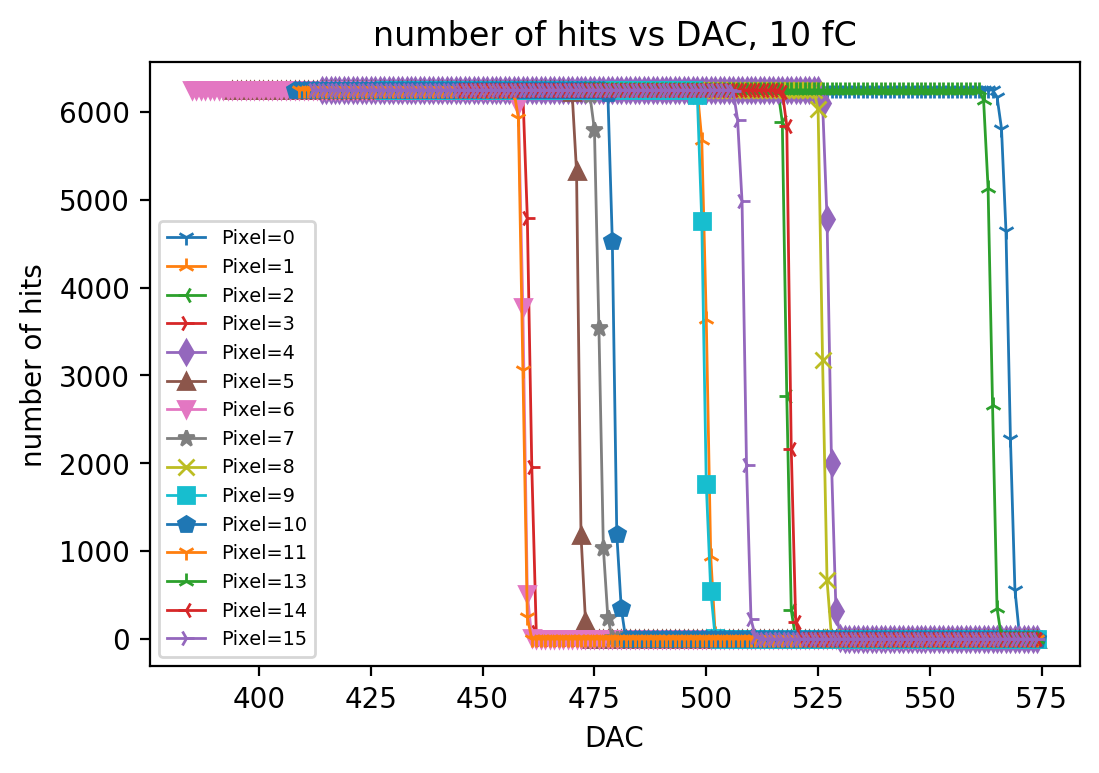

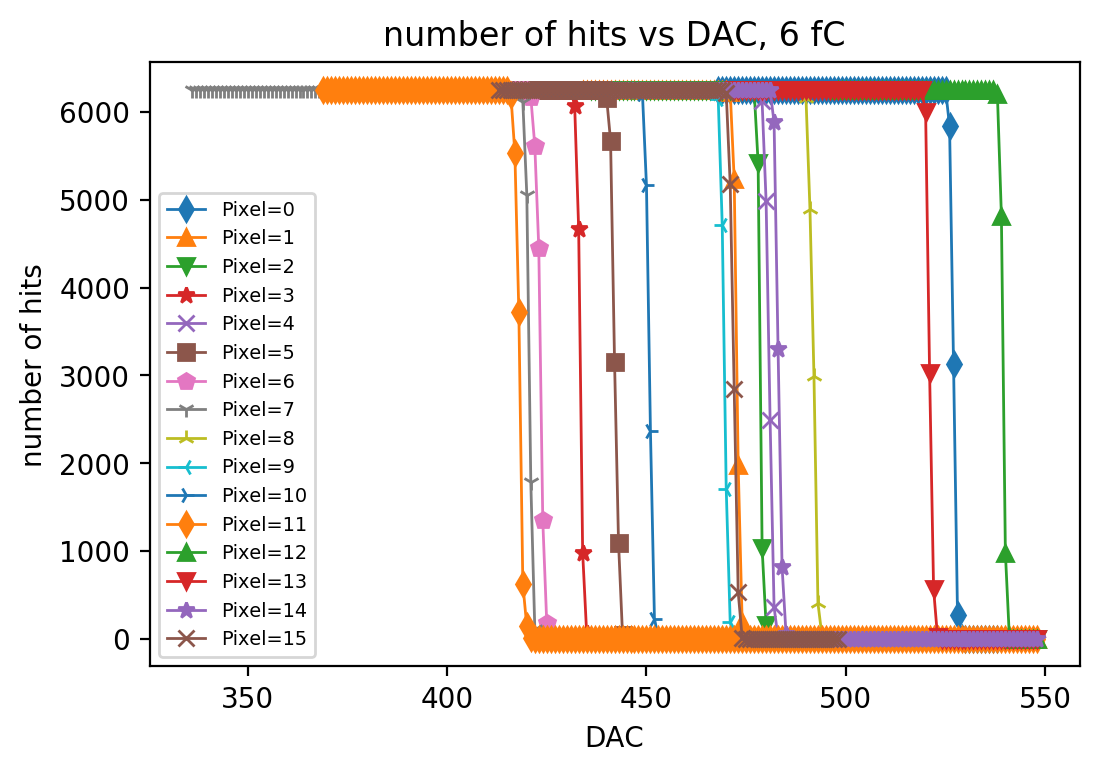

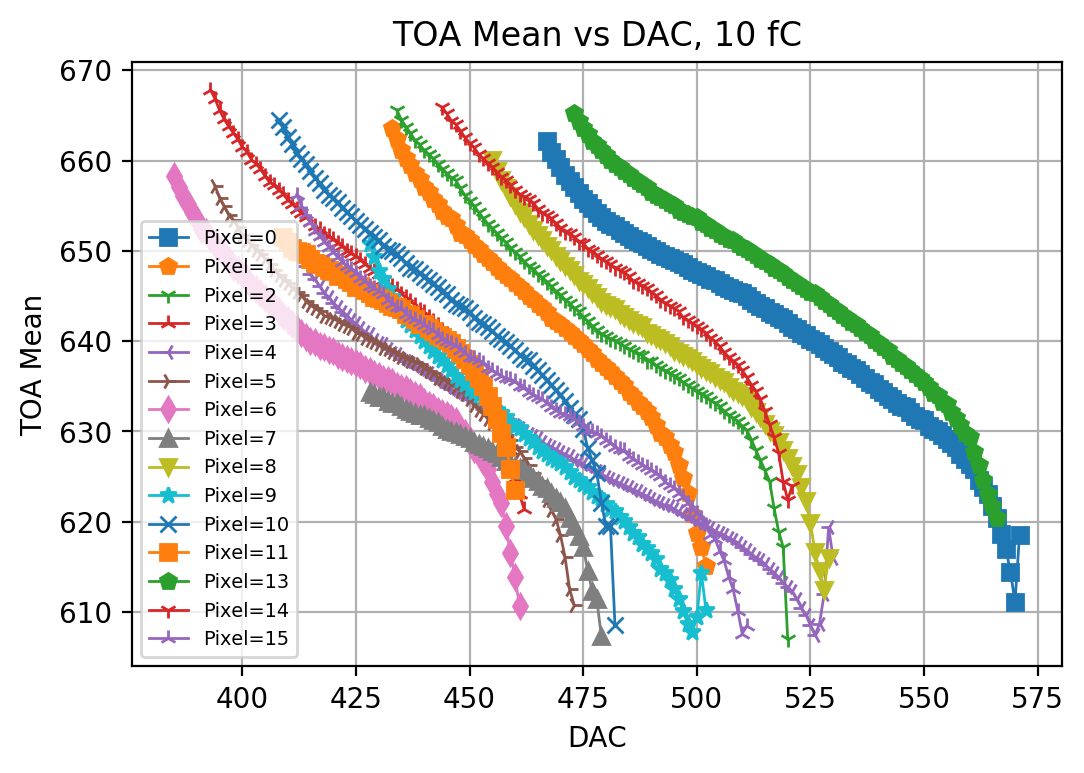

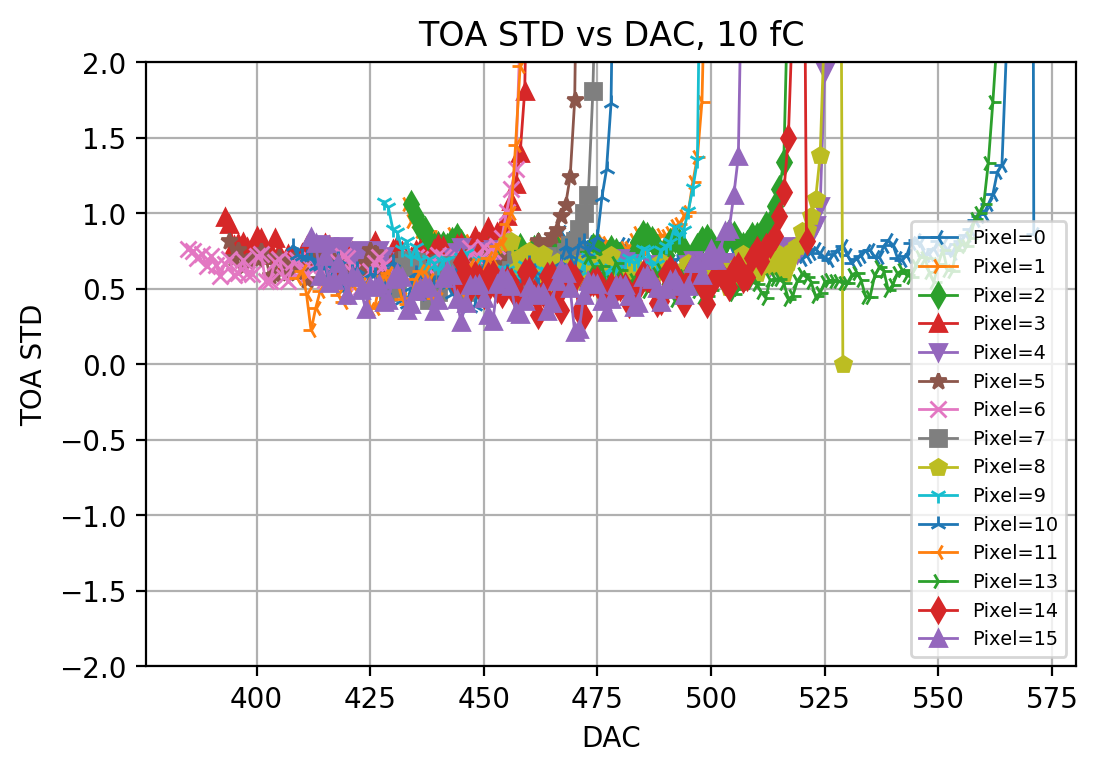

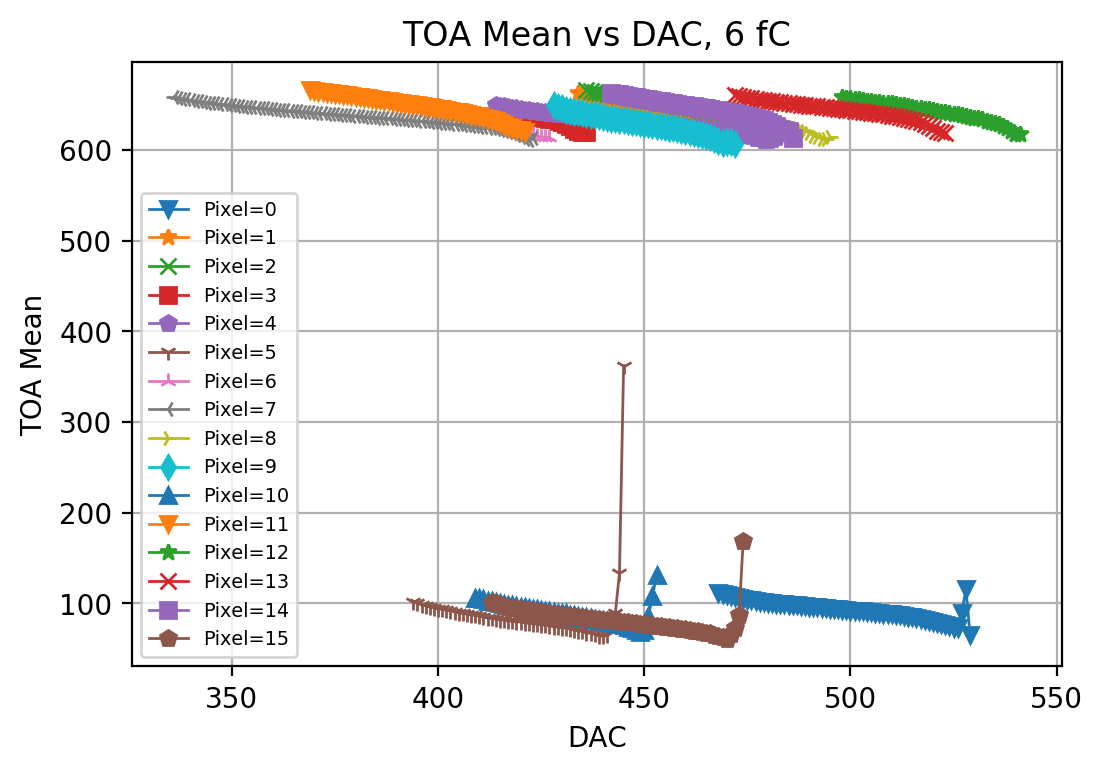

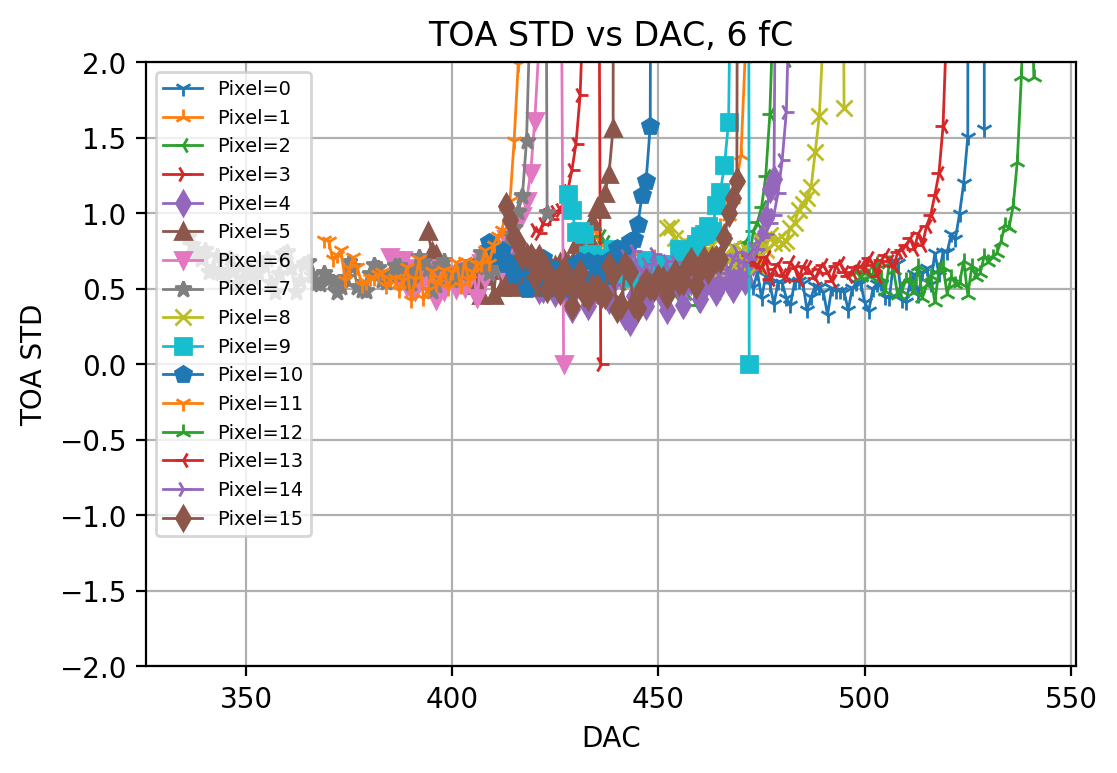

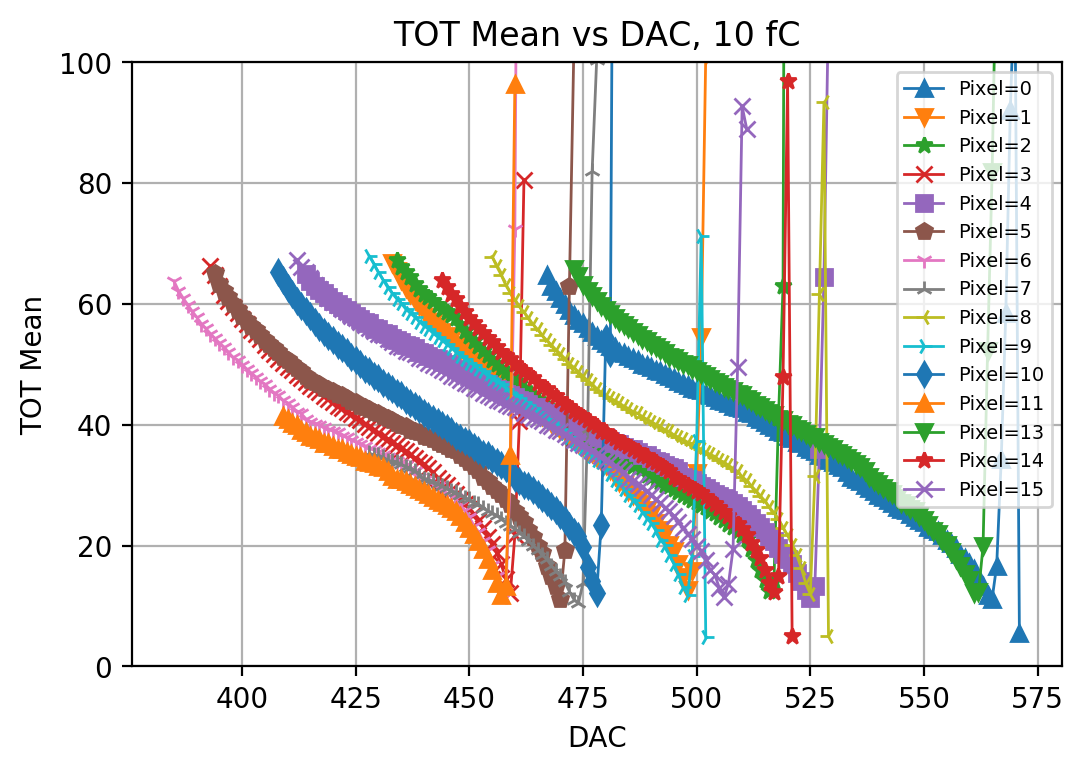

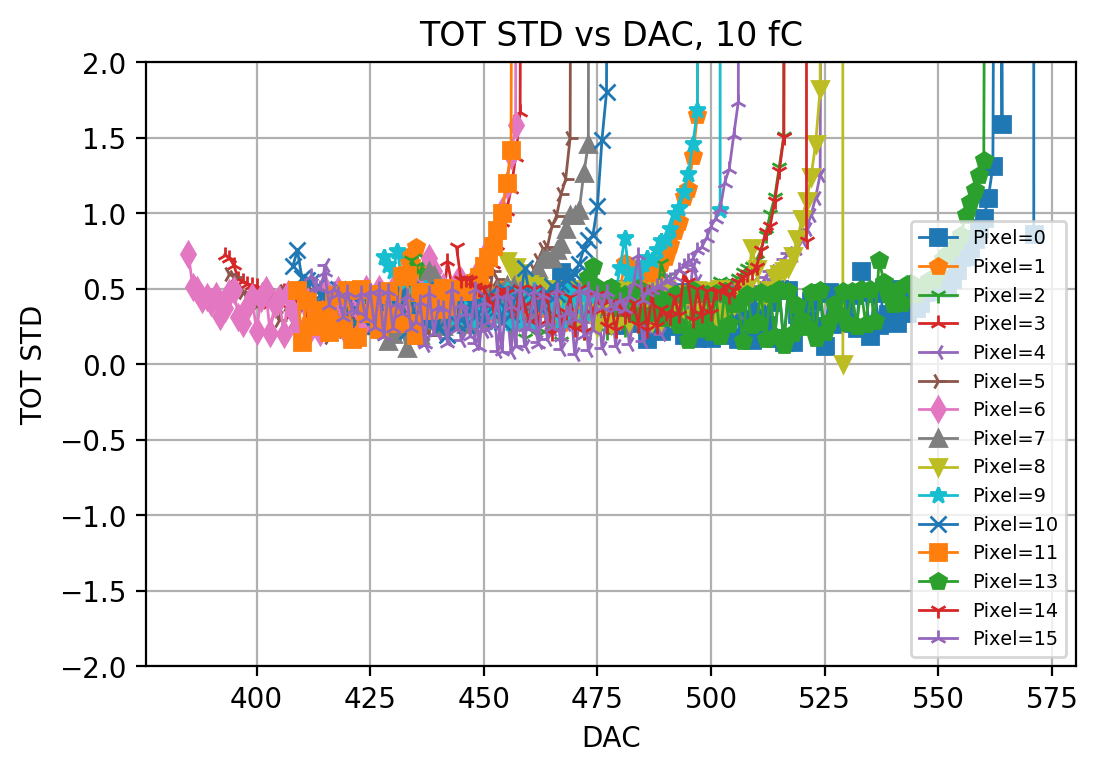

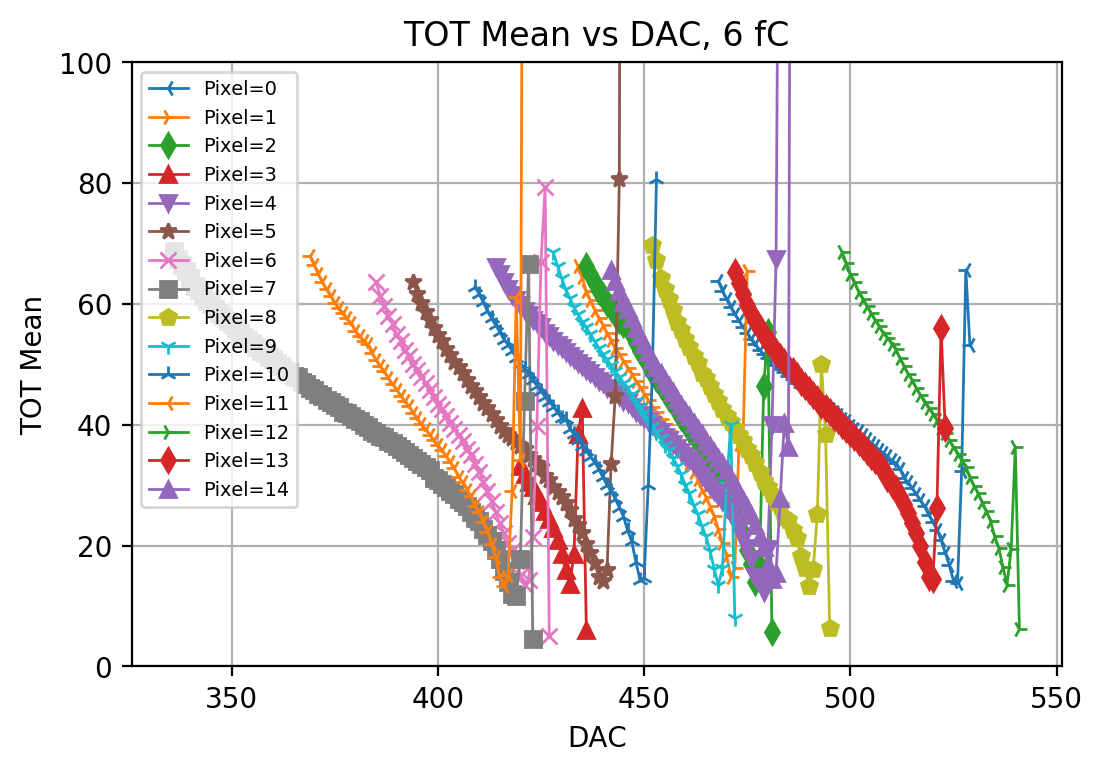

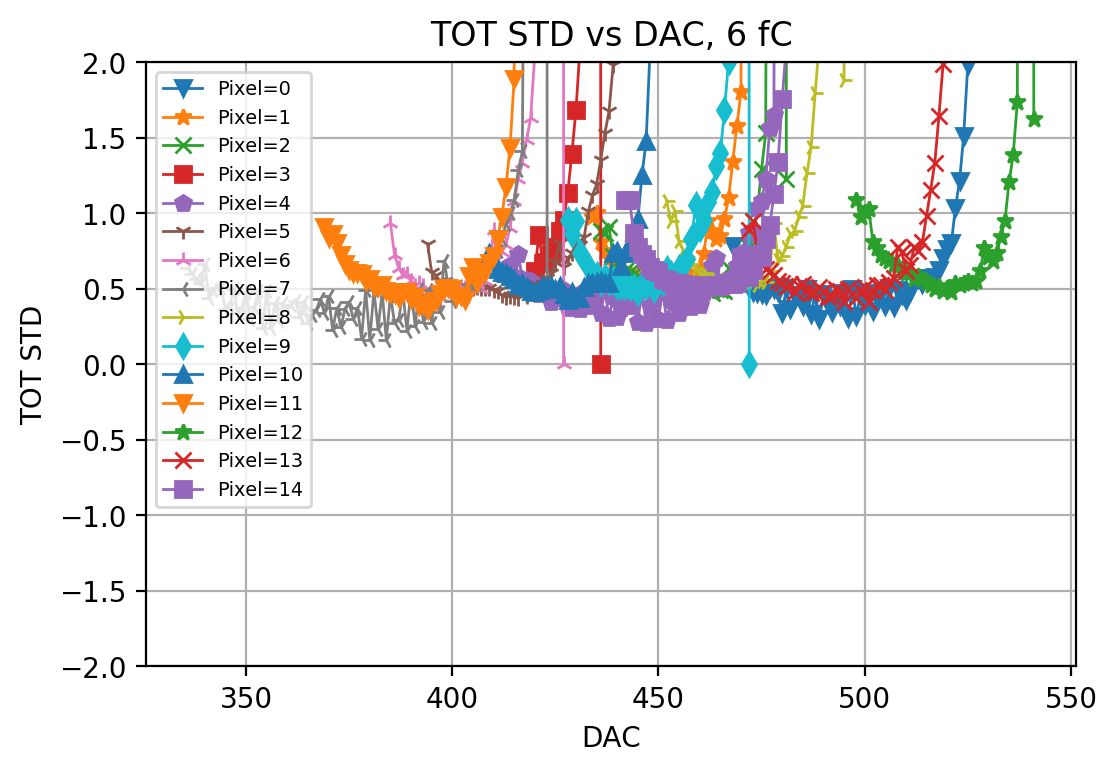

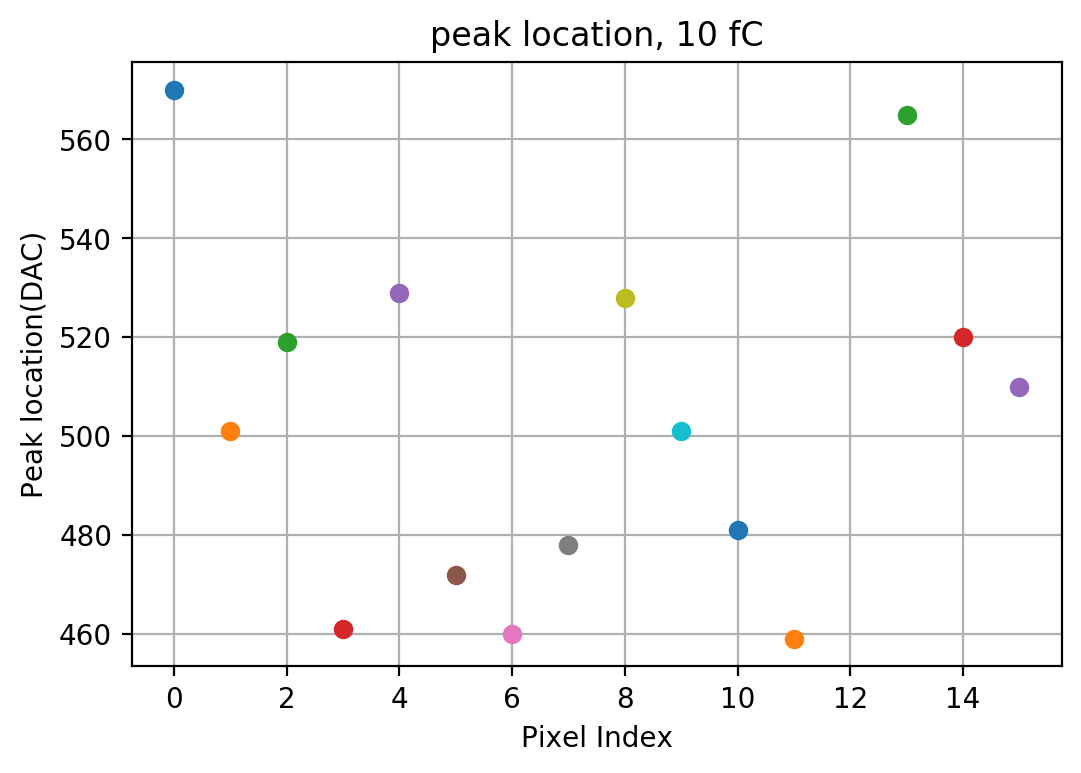

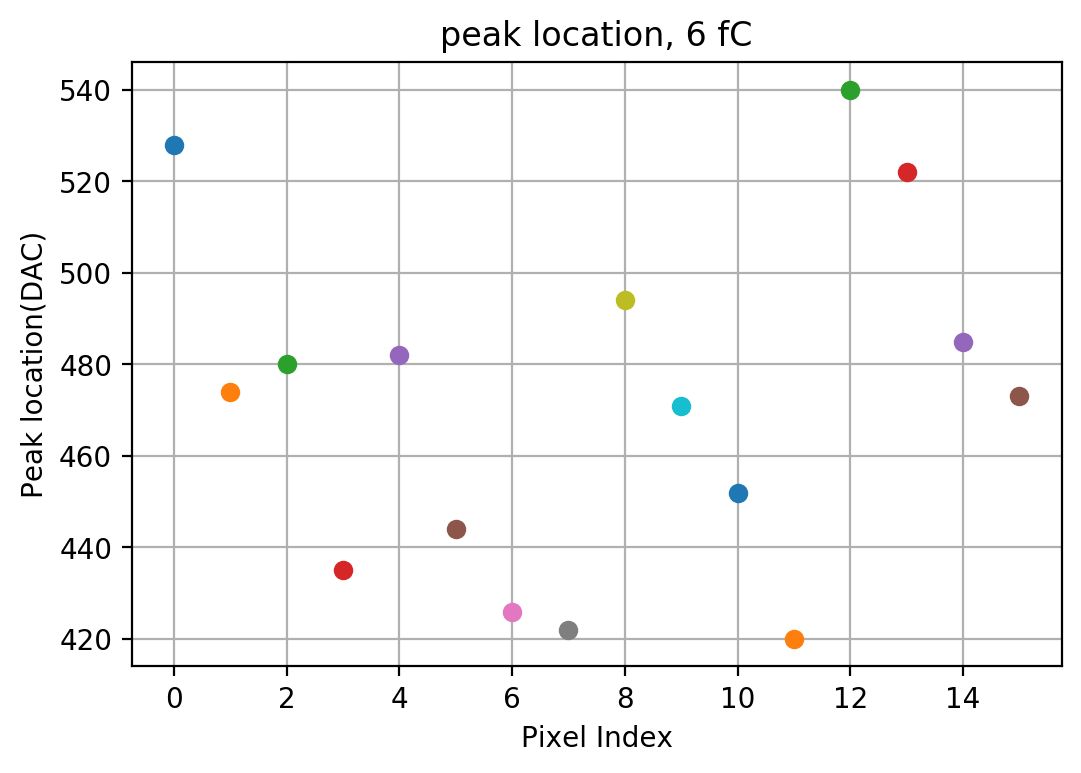

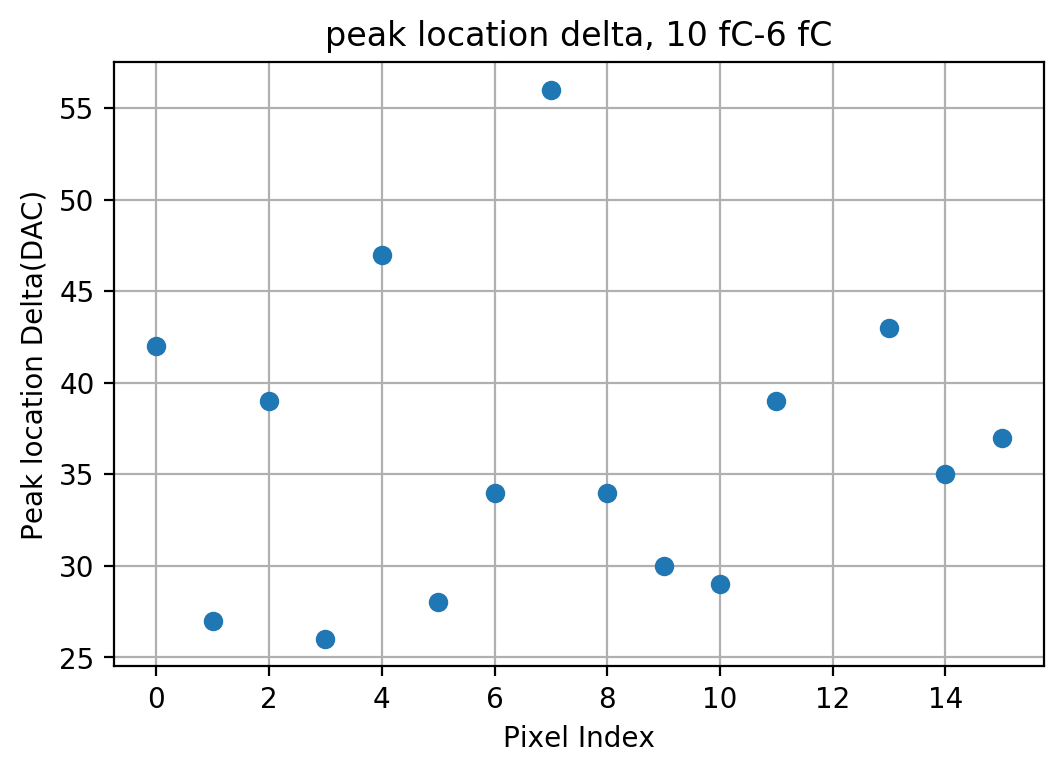

In [15]:
# plt.style.use('science')
import itertools
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
pp = PdfPages(path_lvl1+"plots_threshold_scan_TDC_10fC_6fC"+".pdf")

# marker=['.-','o-','x-','']

#######################  plot  ############################################
######### Plot hits vs DAC  ##############



left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(hits_10fC_scurve_list)):
    ax1.plot(DAC_10fC_list[i][DAC_10fC_start_list[i]:200],hits_10fC_scurve_list[i][DAC_10fC_start_list[i]:200],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
# ax1.grid()
ax1.set(xlabel='DAC', ylabel='number of hits',
       title='number of hits vs DAC, 10 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(hits_6fC_scurve_list)):
    range_dac = len(hits_6fC_list[i])
    ax1.plot(DAC_6fC_list[i][DAC_6fC_start_list[i]:range_dac-1],hits_6fC_scurve_list[i][DAC_6fC_start_list[i]:range_dac-1],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_6fC_list[i] )

# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
# ax1.grid()
ax1.set(xlabel='DAC', ylabel='number of hits',
       title='number of hits vs DAC, 6 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)



######### Plot toa vs DAC  ##############

left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_10fC_scurve_list)):
    ax1.plot(DAC_10fC_list[i][DAC_10fC_start_list[i]:200-1],toa_mu_10fC_scurve_list[i][DAC_10fC_start_list[i]:200-1],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA Mean',
       title='TOA Mean vs DAC, 10 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_10fC_scurve_list)):
    ax1.plot(DAC_10fC_list[i][DAC_10fC_start_list[i]:200-1],toa_std_10fC_scurve_list[i][DAC_10fC_start_list[i]:200-1],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-2,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA STD',
       title='TOA STD vs DAC, 10 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)

fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_6fC_scurve_list)):
    range_dac = len(hits_6fC_list[i])
    ax1.plot(DAC_6fC_list[i][DAC_6fC_start_list[i]:range_dac-1],toa_mu_6fC_scurve_list[i][DAC_6fC_start_list[i]:range_dac-1],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_6fC_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA Mean',
       title='TOA Mean vs DAC, 6 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(hits_6fC_scurve_list)):
    range_dac = len(hits_6fC_list[i])
    ax1.plot(DAC_6fC_list[i][DAC_6fC_start_list[i]:range_dac-1],toa_std_6fC_scurve_list[i][DAC_6fC_start_list[i]:range_dac-1],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_6fC_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-2,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA STD',
       title='TOA STD vs DAC, 6 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)



######### Plot tot vs DAC  ##############

left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_10fC_scurve_list)):
    ax1.plot(DAC_10fC_list[i][DAC_10fC_start_list[i]:200-1],tot_mu_10fC_scurve_list[i][DAC_10fC_start_list[i]:200-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=0,top=100)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT Mean',
       title='TOT Mean vs DAC, 10 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_10fC_scurve_list)):
    ax1.plot(DAC_10fC_list[i][DAC_10fC_start_list[i]:200-1],tot_std_10fC_scurve_list[i][DAC_10fC_start_list[i]:200-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-2,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT STD',
       title='TOT STD vs DAC, 10 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_10fC_scurve_list)):
    range_dac = len(hits_6fC_list[i])
    ax1.plot(DAC_6fC_list[i][DAC_6fC_start_list[i]:range_dac-1],tot_mu_6fC_scurve_list[i][DAC_6fC_start_list[i]:range_dac-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_6fC_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=0,top=100)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT Mean',
       title='TOT Mean vs DAC, 6 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_10fC_scurve_list)):
    range_dac = len(hits_6fC_list[i])
    ax1.plot(DAC_6fC_list[i][DAC_6fC_start_list[i]:range_dac-1],tot_std_6fC_scurve_list[i][DAC_6fC_start_list[i]:range_dac-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_6fC_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-2,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT STD',
       title='TOT STD vs DAC, 6 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)

######### Plot transition point vs pixel  ##############

left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

pixel_to_plot_10fC = [0,1,2,3,4,5,6,7,8,9,10,11,13,14,15]

fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(hits_10fC_scurve_list)):
    ax1.plot(pixel_to_plot_10fC[i],DAC_10fC_list[i][DAC_10fC_transition_list[i]],
                 'o',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='Pixel Index', ylabel='Peak location(DAC)',
       title='peak location, 10 fC')
# ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


pixel_to_plot_6fC = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(hits_6fC_scurve_list)):
    ax1.plot(pixel_to_plot_6fC[i],DAC_6fC_list[i][DAC_6fC_transition_list[i]],
                 'o',linewidth=1, label=pixel_index_scurve_6fC_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='Pixel Index', ylabel='Peak location(DAC)',
       title='peak location, 6 fC')
# ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)



a=[]
b=[]
c=[]
for i in range(0,len(pixel_to_plot_10fC)):
    a += [DAC_10fC_list[i][DAC_10fC_transition_list[i]]]

for i in range(0,len(pixel_to_plot_6fC)):    
    b += [DAC_6fC_list[i][DAC_6fC_transition_list[i]]]
    
b=b[:12]+b[13:]
c=np.array(a)-np.array(b)
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(pixel_to_plot_10fC,c,
                 'o',linewidth=1, label=pixel_index_scurve_6fC_list[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='Pixel Index', ylabel='Peak location Delta(DAC)',
       title='peak location delta, 10 fC-6 fC')
# ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)



pp.close()

In [9]:
a=[]
b=[]
c=[]
for i in range(0,len(pixel_to_plot_10fC)):
    a += [DAC_10fC_list[0][DAC_10fC_transition_list[i]]]

for i in range(0,len(pixel_to_plot_6fC)):    
    b += [DAC_6fC_list[i][DAC_6fC_transition_list[i]]]
    
b=b[:12]+b[13:]
c=np.array(a)-np.array(b)
    
print(a)
print(b)
print(c)

[570, 501, 519, 461, 529, 472, 485, 478, 528, 501, 481, 459, 565, 520, 510]
[528, 474, 480, 435, 482, 444, 426, 422, 494, 471, 452, 420, 522, 485, 473]
[42 27 39 26 47 28 59 56 34 30 29 39 43 35 37]
